# Análise exploratória de dados

In [81]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#589fef", "#ff8f86", "#858588"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## **1. Leitura do conjunto de dados**

In [72]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **2. Descrição dos dados**

![Titanic afundando](../images/image_titanic.jpg)

O conjunto de dados **Titanic** contém informações sobre os passageiros do desastre ocorrido em 15 de abril de 1912, envolvendo o naufrágio do navio RMS Titanic. Estes dados foram disponibilizados na plataforma [Kaggle](https://www.kaggle.com/competitions/titanic), em 2012, por [Will Cukierski](https://www.kaggle.com/wcukierski). O objetivo era utilizá-los em uma competição de aprendizado de máquina para aplicar análise preditiva e determinar quais passageiros eram propensos a sobreviver ao desastre.

### 2.1. Dicionário de dados

In [41]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu ou não,qualitativa,nominal
1,pclass,"Classe em que o passageiro viajou (1, 2 ou 3)",qualitativa,ordinal
2,sex,Gênero do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Número de irmãos ou cônjuge a bordo,quantitativa,discreta
5,parch,Número de pais ou filhos a bordo,quantitativa,discreta
6,fare,Valor da tarifa paga pelo passageiro,quantitativa,contínua
7,embarked,Porto em que o passageiro embarcou,qualitativa,nominal
8,class,Classe do passageiro (em ordinal),qualitativa,ordinal
9,who,Categoria do passageiro,qualitativa,nominal


Tem-se 15 variáveis, com 9 qualitativas nominais, 2 qualitativas ordinais, 2 quantitativas discretas e 2 quantitativas contínuas.

### 2.2. Instâncias

In [30]:
# Quantidade de instâncias

qtdInstancia = df.shape[0] #shape retorna uma tupla, no qual o primeiro elemento é o num de linhas

display(qtdInstancia)
display(Markdown(
    "---\n"
    "O conjunto de dados possui **891 instâncias**, cada uma representando um passageiro que estava a "
    "bordo do navio. Logo, tem-se informações de 891 passageiros."
    "\n"
))

891

---
O conjunto de dados possui **891 instâncias**, cada uma representando um passageiro que estava a bordo do navio. Logo, tem-se informações de 891 passageiros.


### 2.3. Valores Faltantes

In [42]:
# Quantidade de valores faltantes/ausentes

totalVf = df.isnull().sum()

display(total_vf)
display(Markdown(
    "---\n"
    "A partir deste resultado, pode-se observar que há 3 variavéis com valores faltantes: _age_, _deck_ e "
    "_embark_town_. Em especial, a variável _deck_ apresenta uma quantidade significativa de valores ausentes, "
    "visto que possui informações de apenas 203 passageiros. Portanto, as análises serão realizadas sem " 
    "considerar a coluna desta variável."
))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

---
A partir deste resultado, pode-se observar que há 3 variavéis com valores faltantes: _age_, _deck_ e _embark_town_. Em especial, a variável _deck_ apresenta uma quantidade significativa de valores ausentes, visto que possui informações de apenas 203 passageiros. Portanto, as análises serão realizadas sem considerar a coluna desta variável.

## **3. Perguntas de partida e hipóteses**

**- Qual a taxa de sobrevivência geral?**<br>
    _Hipótese:_ Menor que 50%.
    
**- Há relação entre a idade dos passageiros e a sua sobrevivência?**<br>
    _Hipótese:_ Sim. Passageiros mais novos [0-29 anos] apresentaram uma maior taxa de sobrevivência.
    
**- Há relação entre o sexo dos passageiros e a sua sobrevivência?**<br>
    _Hipótese:_ Sim. Passageiros do sexo feminino apresentaram uma maior taxa de sobrevivência.
    
**- Existe alguma relação entre passageiros sozinhos, acompanhados e a taxa de sobrevivência?**<br>
    _Hipótese:_ Acredita-se que passageiros acompanhados obtiveram uma maior taxa de sobrevivência.

**- Passageiros acompanhados por crianças obteve uma maior taxa de sobrevivência em relação aos não acompanhados por crianças?**<br>
    _Hipótese:_ Sim. Passageiros acompanhados com crianças apresentaram uma taxa de sobrevivência maior.

**- A classe do ticket do passageiro interferiu na taxa de sobrevivência?**<br>
    _Hipótese:_ Sim. Passageiros da primeira classe tiveram uma maior taxa de sobrevivência.
    
**- Há relação entre o local de embarque dos passageiros e a taxa de sobrevivência?**<br>
    _Hipótese:_ Não. O local de embarque não interferiu na sobrevivência dos passageiros.

### 3.1. Estatísticas Descritivas

Antes de realizar as vizualizações dos dados, iremos obter as estatísticas descritivas.

In [22]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Há mais passageiros do sexo masculino do que do sexo feminino.
* O lugar que teve o maior número de embarcações foi Southampton.
* A terceira classe teve o maior número de passageiros.
* A idade média dos passageiros é de 29 anos, com o mínimo de 0.42 anos (5 meses) e máximo de 80 anos, aproximadamente.
* A média de acompanhantes irmaõs/cônjugues do passageiro é de 0.53, com o mínimo de 0 e o máximo de 8 acompanhantes.
* A média de acompanhantes pais/filhos do passageiro é de 0.38, com o mínimo de 0 e o máximo de 6 acompanhantes.

### 3.2 Visualizações

#### 3.2.1. Qual a taxa de sobrevivência geral?

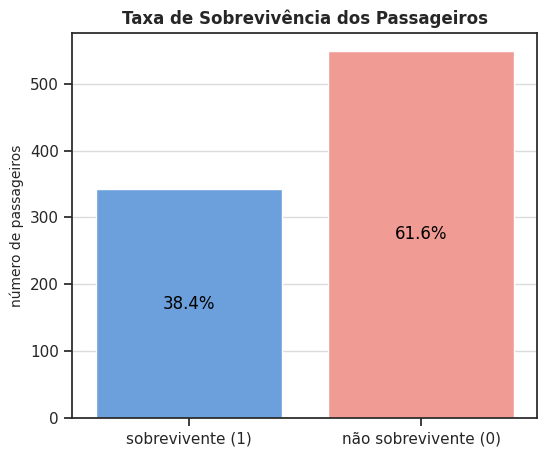

In [76]:
total_passageiros = df.shape[0]
total_sobreviventes = df['survived'].sum()
total_nao_sobreviventes = total_passageiros - total_sobreviventes

#Total em porcentagem
percent_sobreviventes = (total_sobreviventes / total_passageiros) * 100
percent_nao_sobreviventes = (total_nao_sobreviventes / total_passageiros) * 100

dados = {
    'Status': ['sobrevivente (1)', 'não sobrevivente (0)'],
    'Quantidade': [total_sobreviventes, total_nao_sobreviventes],
    'Porcentagem': [percent_sobreviventes, percent_nao_sobreviventes]
}
df_taxa = pd.DataFrame(dados)

plt.figure(figsize=(6, 5))
ax = sns.barplot(x='Status', y='Quantidade', data=df_taxa)

for container in ax.containers:
    labels = [f'{percent:.1f}%' for percent in df_taxa['Porcentagem']]
    ax.bar_label(container, labels=labels, label_type='center', color='black')

ax.set_title('Taxa de Sobrevivência dos Passageiros', fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('número de passageiros', fontsize=10)

ax.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Com os dados obtidos, pode-se afirmar que a hipótese estava correta. A taxa de passageiros sobreviventes ao naufrágio foi de, aproximadamente, 38,4%, isto é, menor que 50%.

#### 3.2.2. Há relação entre a idade dos passageiros e a sua sobrevivência?

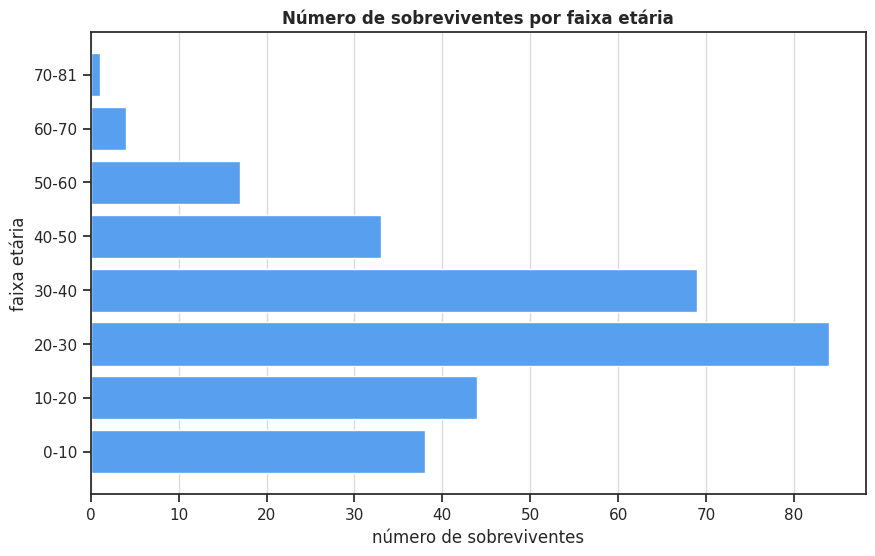

In [206]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-81']
df['FaixaEtaria'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

df_sobreviventes = df[df['survived'] == 1]
contagem_faixas = df_sobreviventes['FaixaEtaria'].value_counts(sort=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(contagem_faixas.index, contagem_faixas.values)


ax.set_title('Número de sobreviventes por faixa etária', fontweight='bold')
ax.set_xlabel('número de sobreviventes')
ax.set_ylabel('faixa etária')

ax.xaxis.grid(True, linestyle='-', alpha=0.7)  
ax.yaxis.grid(False)  

plt.show()

* Passageiros com idade entre 20-29 anos obteve um maior número de sobreviventes.
* Crianças [0-10 anos] e adolescentes [11-20] obteram um maior número de sobreviventes do que passageiros mais velhos [41+].

Sendo assim, confirma-se a hipótese de que passageiros mais novos [0-29 anos] teve uma maior taxa de sobrevivência.

#### 3.2.3. Há relação entre o sexo dos passageiros e a sua sobrevivência?

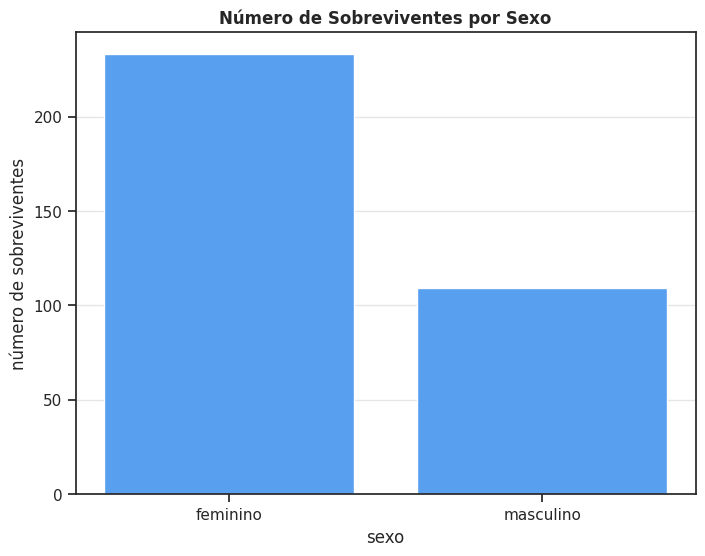

In [78]:
df_sobreviventes = df[df['survived'] == 1]

contagem_sexo = df_sobreviventes['sex'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(contagem_sexo.index, contagem_sexo.values)

ax.set_title('Número de Sobreviventes por Sexo', fontweight='bold')
ax.set_xlabel('sexo')
ax.set_ylabel('número de sobreviventes')

ax.yaxis.grid(True, linestyle='-', alpha=0.5)
ax.xaxis.grid(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['feminino', 'masculino'])

plt.show()

Conforme a hipótese sugerida, as passageiras do sexo feminino apresentaram uma taxa de sobrevivência superior.

#### 3.2.4. Existe alguma relação entre passageiros sozinhos, acompanhados e a taxa de sobrevivência?

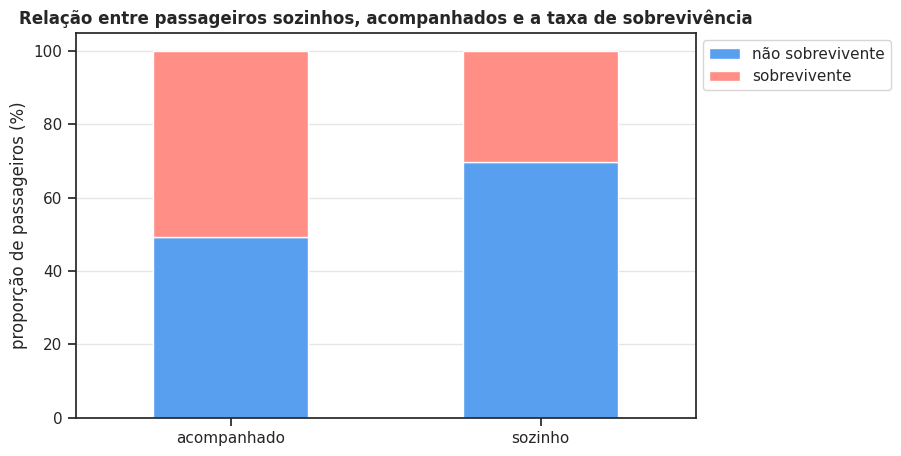

In [208]:
df_counts = df.groupby(['alone', 'survived']).size().unstack(fill_value=0)

df_proportions = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

ax = df_proportions.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.title('Relação entre passageiros sozinhos, acompanhados e a taxa de sobrevivência', fontweight='bold')
plt.xlabel('')
plt.ylabel('proporção de passageiros (%)')
plt.xticks(ticks=[0, 1], labels=['acompanhado', 'sozinho'], rotation=0)


ax.grid(axis='y', linestyle='-', alpha=0.5)
ax.xaxis.grid(False)

plt.legend(labels=['não sobrevivente', 'sobrevivente'], bbox_to_anchor=(1, 1), loc='upper left')



plt.show()

De acordo com o gráfico, pode-se observar que os passageiros que estavam acompanhados tiveram uma maior taxa de sobrevivência. Sendo assim, confirma-se a hipótese.

#### 3.2.5. Passageiros acompanhados por crianças obteve uma maior taxa de sobrevivência em relação aos não acompanhados por crianças?

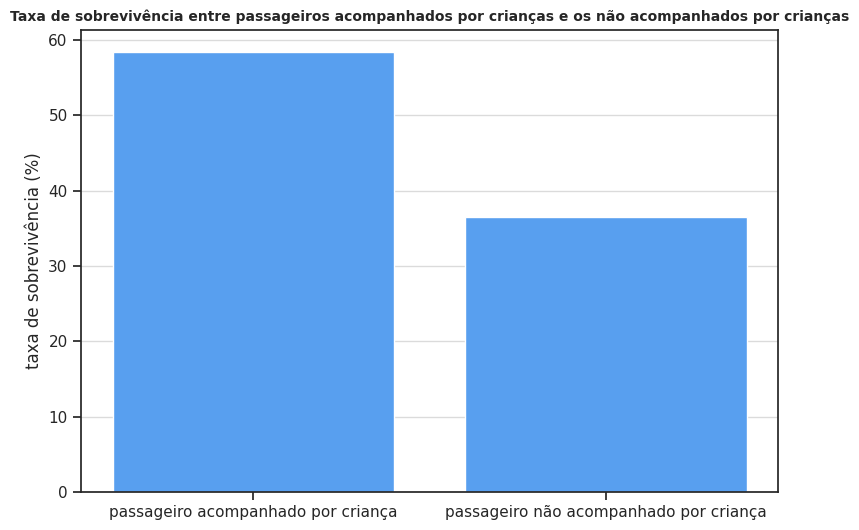

In [209]:
df['is_child'] = df['who'] == 'child'
df['accompanied'] = (df['sibsp'] + df['parch'] > 0).astype(int)
df['accompanied_with_children'] = df['is_child'] & df['accompanied']

df['category'] = 'passageiro não acompanhado por criança'
df.loc[df['accompanied_with_children'], 'category'] = 'passageiro acompanhado por criança'

# Calcular as taxas de sobrevivência para cada categoria
taxa_sobrevivencia = df.groupby('category')['survived'].mean() * 100

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(9, 6))

# Plotar barras
bar_width = 0.35
categories = taxa_sobrevivencia.index
valores = taxa_sobrevivencia.values

bars = ax.bar(categories, valores)

# Adicionar título e rótulos aos eixos
ax.set_title('Taxa de sobrevivência entre passageiros acompanhados por crianças e os não acompanhados por crianças', fontweight='bold', size=10)
ax.set_xlabel('')
ax.set_ylabel('taxa de sobrevivência (%)')

ax.yaxis.grid(True, linestyle='-', alpha=0.7)
ax.xaxis.grid(False)  

plt.show()

Logo, percebe-se que a taxa de sobrevivência de passageiros que estavam acompanhados por crianças é maior em relação aos não acompanhado por criança.

#### 3.2.6. A classe do ticket do passageiro interferiu na taxa de sobrevivência?

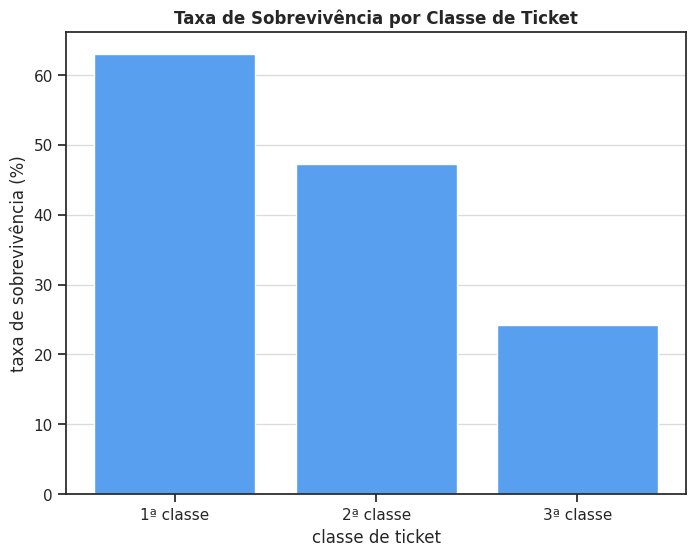

In [210]:
taxa_sobrevivencia_classe = df.groupby('pclass')['survived'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(taxa_sobrevivencia_classe.index, taxa_sobrevivencia_classe.values)

ax.set_title('Taxa de Sobrevivência por Classe de Ticket', fontweight='bold')
ax.set_xlabel('classe de ticket')
ax.set_ylabel('taxa de sobrevivência (%)')
ax.set_xticks(taxa_sobrevivencia_classe.index)
ax.set_xticklabels(['1ª classe', '2ª classe', '3ª classe'])

ax.yaxis.grid(True, linestyle='-', alpha=0.7)
ax.xaxis.grid(False) 

plt.show()

De acordo com o gráfico, pode-se afirmar que a classe do ticket do passageiro interferiu na sua sobrevivência. Visto que os passageiros na classe superior [1° classe] obteram a maior taxa de sobrevivência, ou seja, a probabilidade de sobrevivência foi significativamente maior para aqueles na 1ª classe em comparação com os passageiros da 2ª e 3ª classes.

#### 3.2.7. Há relação entre o local de embarque dos passageiros e a taxa de sobrevivência?

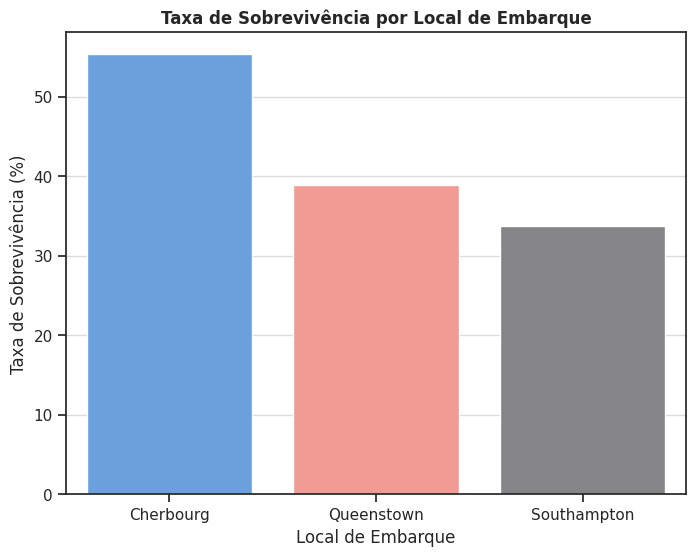

In [73]:
taxa_sobrevivencia_embarque = df.groupby('embarked')['survived'].mean() * 100

df_embarque = taxa_sobrevivencia_embarque.reset_index()
df_embarque.columns = ['Local de Embarque', 'Taxa de Sobrevivência (%)']

embarque_labels = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df_embarque['Local de Embarque'] = df_embarque['Local de Embarque'].map(embarque_labels)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Local de Embarque', y='Taxa de Sobrevivência (%)', data=df_embarque)

ax.set_title('Taxa de Sobrevivência por Local de Embarque', fontweight='bold')
ax.set_xlabel('Local de Embarque')
ax.set_ylabel('Taxa de Sobrevivência (%)')

ax.yaxis.grid(True, linestyle='-', alpha=0.7)
ax.xaxis.grid(False)  

plt.show()


Apenas com essas informações, não é possível dizer que há relação entre o local de embarque e a taxa de sobrevivência, visto que diversos fatores podem estar interligados com o local de embarque. Por exemplo, pode existir mais passageiros de 1° classe que embarcou em Cherbourg. Sendo assim, o gráfico que relaciona local de embarque, ticket da classe do passageiro e a taxa de sobrevivência:

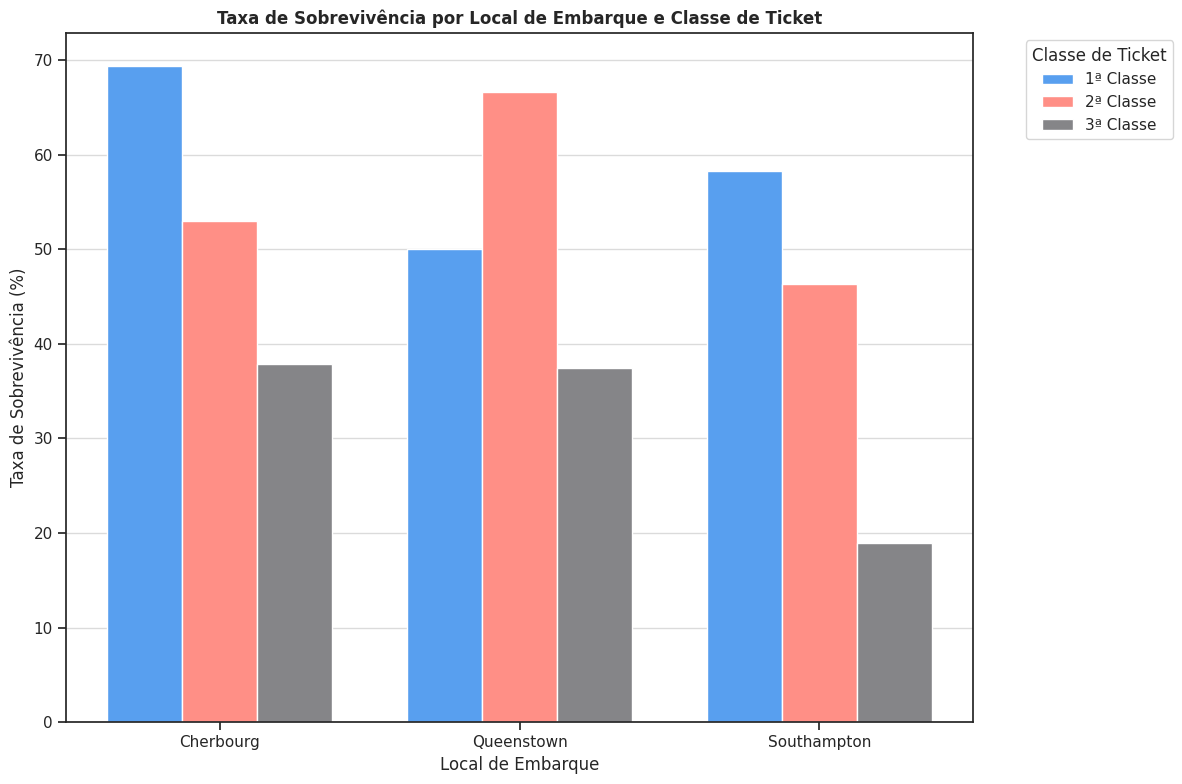

In [74]:
embarque_labels = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df['embarked'] = df['embarked'].map(embarque_labels)

df['pclass'] = df['pclass'].astype(int)

total_passageiros = df.groupby(['embarked', 'pclass'])['survived'].count().unstack()
total_sobreviventes = df[df['survived'] == 1].groupby(['embarked', 'pclass'])['survived'].count().unstack()

taxa_sobrevivencia = (total_sobreviventes / total_passageiros) * 100


fig, ax = plt.subplots(figsize=(12, 8))

width = 0.25  
x = range(len(taxa_sobrevivencia.index))  

classe_labels = ['1ª Classe', '2ª Classe', '3ª Classe']
bars = []


for i, col in enumerate(taxa_sobrevivencia.columns):
    bar = ax.bar(
        [p + width * i for p in x],
        taxa_sobrevivencia[col],
        width=width,
        color=colors[i]
    )
    bars.append(bar)

ax.set_xticks([p + width * (len(taxa_sobrevivencia.columns) / 2 - 0.5) for p in x])
ax.set_xticklabels(taxa_sobrevivencia.index)

ax.set_title('Taxa de Sobrevivência por Local de Embarque e Classe de Ticket', fontweight='bold')
ax.set_xlabel('Local de Embarque')
ax.set_ylabel('Taxa de Sobrevivência (%)')

ax.yaxis.grid(True, linestyle='-', alpha=0.7)

ax.legend(bars, classe_labels, title='Classe de Ticket', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


* Os passageiros de 1° classe que embarcaram em Cherbourg e Southampton tiveram taxas de sobrevivência mais altas em elação as outras classes.
* Os passageiros de 2° classe que embarcaram em Queenstown de tiveram tiveram taxas de sobrevivência mais altas em relação as outras classes.
* Os passageiros de 3° classe, que embarcaram em qualquer local de embarque, tiveram as menores taxas de sobrevivência no geral.

Sendo assim, a análise dos dados mostrou que o local de embarque não tem uma relação direta e isolada com a taxa de sobrevivência dos passageiros. Em vez disso, a taxa de sobrevivência está mais fortemente influenciada pela classe do ticket dos passageiros.

## 4. Insights

A partir das visualizações criadas, conseguimos adquirir as seguintes informações relevantes:
* No naufrágio, apenas 38,4% dos passageiros sobreviveram.
* A faixa etária que mais obteve sobreviventes foi de 20-29 anos.
* Os passageiros do sexo feminino obteve a maior taxa de sobrevivência.
* Os passageiros que tinham acompanhantes tiveram uma maior taxa de sobrevivência em relação aos sozinhos.
* Os passagerios acompanhados de crianças obteve uma maior taxa de sobrevivência em relação aos não acompanhados por crianças.
* Os passageiros que possuiam o ticket de 1° classe obteve uma maior taxa de sobrevivência em relação aos de 2° e 3° classe. Seguido de 2° e 3° classe, respectivamente.
* A taxa de sobrevivência não possui relação direta com o local de embarque, há interferência da classe dos passageiros.